In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist # 의류분류

In [ ]:
data = fashion_mnist.load_data()
data
# 흑백 사진 , 채널 1
# 컬러 사진 , 채널 3(기본 색상이 r,g,b라서)

In [ ]:
# 각 변수에 저장
# (훈련용 문제, 훈련용 답), (테스트 문제, 테스트 답) = data

X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# train 이미지가 6만장, 각 이미지는 28*28 size
# test 이미지 1만장, 각 이미지는 28*28 size

In [ ]:
# (X_train, y_train), (X_test, y_test) = fasion_mnist.load_data()

In [ ]:
X_train[100] # 픽셀 값 0~255 흑 ~ 백

In [ ]:
# 이미지 출력해보기
for i in range(1, 50, 2) :
  print(y_train[i])
  plt.imshow(X_train[i], cmap='gray')
  plt.show()

In [ ]:
# mlp 다층 퍼셉트론 신경망 모델 -> 1차원만 학습 가능
# 2차원의 이미지 데이터를 -> 1차원 데이터로 변경해야지 학습 가능
# X_train = X_train.reshape(60000, -1) # 열의 개수 알아서 정리(28*28)
# ✔ 60000은 X_train.shape를 했을때의 값
# ✔ -1은 28*28을 바꾸는거
# X_test = X_test.reshape(10000, -1)
# 해당 기능을 제공하는 함수가 존재 : flatten ==> 사용할거임

In [ ]:
# 답 데이터 처리
# 라벨이 0~9 : 여러개 ==> 다중분류
# 다중 분류 -> 원핫인코딩을 해야한다
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# 크기확인
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)
# from tensorflow.keras.utils import to_categorical

(60000, 10)
(10000, 10)


### 활성화함수, 최적화함수 비교
 - 1. 중간층 활성화 : sigmoid, 최적화 sgd
 - 2. 중간층 활성화 : relu, 최적화 sgd
 - 3. 중간층 활성화 : relu, 최적화 : adam
  - 각각의 신경망을 설계하고 결과를 비교!


In [ ]:
# 최적화 함수 하이퍼 파라미터 변경을 위해 import
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# 모델 생성 함수 정의
# 활성화 함수, 최적화 함수를 매개변수로 연결
def create_model(acti, opti) :

    # 뼈대 구축
    model = Sequential()

    # 입력층 : 2차원 -> 1차원
    # input_dim = 값이 하나일때(ex 784, 4 등의 하나의 값일때 사용)
    # input_shape = 고차원일때 사용
    model.add(Flatten(input_shape = (28,28))) # 입력층 activation X

    # 중간층
    model.add(Dense(200, activation = acti)) # 중간층 activation O
    model.add(Dense(100, activation = acti))
    model.add(Dense(50, activation = acti))

    # 출력층 , 다중 분류 units : 클래스의 개수,
    # 활성화함수 : 'sigmoid'(이진분류), 'softmax'(다중분류)
    model.add(Dense(10 , activation = 'softmax'))

    # compile
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = opti,
                  metrics = ['accuracy'])


    # 반환 -> 생성한 모델 반환
    return model

In [ ]:
# fit 함수 정의
# 모델명만 넣어주면 fit 진행하는 코드 작성
# estimator 예측기
def fit_model(estimator) :
    h = estimator.fit(X_train, y_train_one_hot,
                      validation_split = 0.3, # 검증용 데이터를 따로 만들지 않아도 fit이 진행되면서 자동으로 만들어줌
                      epochs = 30,
                      batch_size = 64)
    return h


In [ ]:
# 1. sig + sgd
model1 = create_model(acti = 'sigmoid', opti = SGD(learning_rate = 0.01))
model1.summary()
#h1 = fit_model(model1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h1 = fit_model(model1)

In [ ]:
# 2. relu + sgd
model2 = create_model(acti = 'relu', opti = SGD(learning_rate = 0.01))
h2 = fit_model(model2)

In [ ]:
# 3. relu + adam
model3 = create_model('relu', Adam(learning_rate = 0.001))
h3 = fit_model(model3)

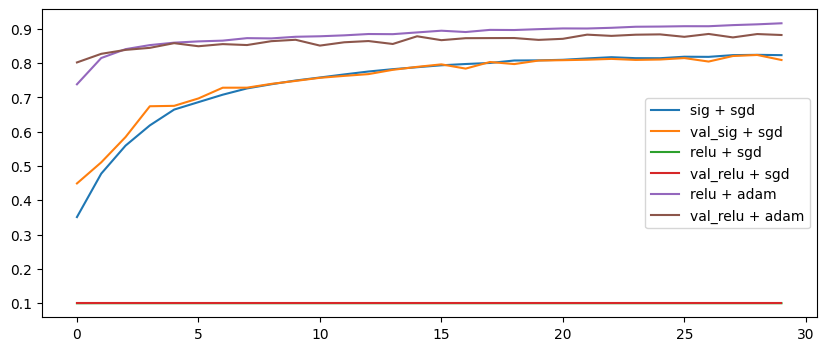

In [ ]:
# 3종류 모델 시각화
plt.figure(figsize = (10,4))

# model1 : sig + sgd
plt.plot(h1.history['accuracy'], label='sig + sgd')
plt.plot(h1.history['val_accuracy'], label='val_sig + sgd')
# model2 : relu + sgd
plt.plot(h2.history['accuracy'], label='relu + sgd')
plt.plot(h2.history['val_accuracy'], label='val_relu + sgd')

# model3 : relu + adam
plt.plot(h3.history['accuracy'], label='relu + adam')
plt.plot(h3.history['val_accuracy'], label='val_relu + adam')

plt.legend()
plt.show()

# 기울기 소실 문제와 최적의 w,b를 찾아서 갱신하는 경사하강법
# 최적화된 친구들이 relu, adam 정리

### 최적화 모델 찾기
 - 모델 체크포인트 : 모델 저장
 - 얼리스탑핑 : 학습을 조기 중단(과대적합 해소, 시간낭비 방지)

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [ ]:
# 1. 모델 저장
# 베스트 모델을 저장할 폴더
model_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데/model/'

# 만약 해당 폴더가 없다면 생성
if not os.path.exists(model_dir):

  # 폴더 생성하는 코드
  os.mkdir(model_dir)

In [ ]:
# 베스트 모델의 파일명 설정
# 정규식 표현법 {변수명 : 출력형태}
# {epoch : 03d} : 반복횟수 변수값을 가져와서 정수형 3자리로 표시(3자리보다 작으면 왼쪽을 0으로 채움)
# {val_accuracy : .2f} : 검증 정확도 변수값을 가져와서 소수점 2째자리까지 표시
# 파일명 형태 : fashion_반복횟수_검증정확도.hdf5
file_path = model_dir + "fashion_{epoch:03d}_{val_accuracy:.2f}.hdf5"

# 베스트 체크 포인트 정의
f_mckp = ModelCheckpoint(filepath = file_path,      # 파일 경로 설정
                         monitor = 'val_accuracy',  # 해당 값을 기준으로 모델(파일) 저장
                         save_best_only = True,     # monitor 값이 가장 최고점을 갱신했을 때 모델을 저장
                         verbose = 1                # 모델 개선 및 저장 메세지 표시
                         )

In [ ]:
# 2. 조기 학습 중단
f_early = EarlyStopping(monitor = 'val_accuracy',
                        # monitor의 값의 개선을 몇번이나 기다려 줄 것인지 설정
                        patience = 5)


# ==> model 학습 시 val_accuracy가 5번의 반복을 진행할 동안 개선이 되지 않으면
#     학습을 중단시키겠음!

In [ ]:
# 모델
model4 = create_model('relu', 'adam')
h4 = model4.fit(X_train, y_train_one_hot,
                validation_split = 0.3,
                epochs = 50,
                batch_size = 64,
                callbacks = [f_mckp, f_early] # 모델 체크 포인트, 얼리스탑핑 설정
                )

In [ ]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

In [ ]:
# 불러오기
best_model = load_model(model_dir + 'fashion_043_0.89.hdf5')

# 모델 평가
best_model.evaluate(X_test,y_test_one_hot) # 0.87

313/313 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.8761


[0.44560152292251587, 0.8761000037193298]